### Importing Libraries.

In [1]:
!pip3 install spotipy
import pandas as pd
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

### Checking charts.csv for max unique songs and entries in dataset.

In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/ML-Project/data/charts.csv")
#full_df = pd.read_csv("/content/drive/MyDrive/ML-Project/top200_9countries_plain.csv")

In [ ]:
print("Unique Songs: ", len(list(full_df['title'].unique())))

Unique Songs:  161080


In [ ]:
full_df.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')

In [ ]:
full_df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Despacito (Featuring Daddy Yankee),1,2017-03-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,365941.0
1,El Amante,2,2017-03-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,SAME_POSITION,179697.0
2,Reggaetón Lento (Bailemos),3,2017-03-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,SAME_POSITION,169647.0
3,Shape of You,4,2017-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,SAME_POSITION,168495.0
4,Chantaje (feat. Maluma),5,2017-03-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,141696.0


In [ ]:
full_df['region'].unique()

array(['Canada', 'Belgium', 'Denmark', 'France', 'Ireland', 'Italy',
       'Sweden', 'United Kingdom'], dtype=object)

In [ ]:
#country_list = ['United States', 'Canada', 'Ireland', 'Germany', 'United Kingdom']
country_list = list(full_df['region'].unique())
unique_songs_count = [] 
total_entries_count = []

for x in country_list:
    #print(x)
    total_entries = len(full_df[full_df['region'] == x])
    #print("Region len: ", total_entries)
    total_entries_count.append(total_entries)
    unique_songs = len(full_df[full_df['region'] == x]['title'].unique())
    unique_songs_count.append(unique_songs)
    #print("Unique songs: ", unique_songs)

In [ ]:
country_entries = {'region' : country_list, 'unique_songs' : unique_songs_count, 'total_entries' : total_entries_count}
df_dist = pd.DataFrame.from_dict(country_entries)

In [ ]:
top20_uniquesongs_regions = df_dist.sort_values(by = ['unique_songs'], ascending = False)
top20_uniquesongs_regions = top20_uniquesongs_regions.head(20)

In [ ]:
top20_totalentries_regions = df_dist.sort_values(by = ['total_entries'], ascending = False)
top20_totalentries_regions = top20_totalentries_regions.head(20)

In [ ]:
len(list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region'])))

10

In [ ]:
chosen_countries = list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region']))

### Fetching TOP200 Data

Filtered by the list of countries with the most entries & individual songs (diverse taste?)

In [ ]:
top200 = full_df[full_df['chart'] == "top200"]

In [ ]:
top200.isnull().sum()

title      7
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [ ]:
top200 = top200[top200['title'].notna()]

In [ ]:
top200.isnull().sum()

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [ ]:
#country_list = ['United States', 'Canada', 'Ireland', 'Germany', 'United Kingdom']
country_list = list(top200['region'].unique())
unique_songs_count = [] 
total_entries_count = []

for x in country_list:
    #print(x)
    total_entries = len(top200[top200['region'] == x])
    #print("Region len: ", total_entries)
    total_entries_count.append(total_entries)
    unique_songs = len(top200[top200['region'] == x]['title'].unique())
    unique_songs_count.append(unique_songs)
    #print("Unique songs: ", unique_songs)

In [ ]:
country_entries = {'region' : country_list, 'unique_songs' : unique_songs_count, 'total_entries' : total_entries_count}
df_dist = pd.DataFrame.from_dict(country_entries)

In [ ]:
top20_uniquesongs_regions = df_dist.sort_values(by = ['unique_songs'], ascending = False)
top20_uniquesongs_regions = top20_uniquesongs_regions.head(20)

In [ ]:
top20_totalentries_regions = df_dist.sort_values(by = ['total_entries'], ascending = False)
top20_totalentries_regions = top20_totalentries_regions.head(20)

In [ ]:
chosen_countries = list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region']))

In [ ]:
chosen_countries

['Canada',
 'Sweden',
 'United States',
 'France',
 'Ireland',
 'Denmark',
 'United Kingdom',
 'Belgium',
 'Italy']

In [ ]:
top200 = top200[(top200['region'] == 'Canada')|(top200['region'] == 'Sweden')|(top200['region'] == 'Belgium')|(top200['region'] == 'Italy')|(top200['region'] == 'Unites States')|(top200['region'] == 'United Kingdom')|(top200['region'] == 'Denmark')|(top200['region'] == 'France')|(top200['region'] == 'Ireland')]


In [ ]:
len(top200)

2819112

In [ ]:
top200.head(1)

,title,rank,date,artist,url,region,chart,trend,streams
203,Sorry,151,2017-03-01,Future,https://open.spotify.com/track/1gb6riq7CCP5clG...,Canada,top200,MOVE_DOWN,20827.0


In [ ]:
top200['id'] = top200['url'].apply(lambda x: x.split('/')[4])
top200.drop('url',axis=1,inplace=True)

In [ ]:
top200.head(1)

,title,rank,date,artist,region,chart,trend,streams,id
203,Sorry,151,2017-03-01,Future,Canada,top200,MOVE_DOWN,20827.0,1gb6riq7CCP5clGpSD0XPH


In [ ]:
#top200.to_csv('data/top200_9countries_plain.csv')

In [ ]:
client_id = '7ac5c16c450e4d59bd2e9cb28dd6f81b'
client_secret = '3811b847b45d4b6282ecc6a8a11878ad'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
song_meta={'id':[],'album':[], 'artist':[], 'explicit':[], 'popularity':[]}

unique = top200["id"].unique()
print(len(unique))
songs_already_used = []
count = 0
#for song_id in top200['id']:
for song_id in unique:
    count += 1
    # get song's meta data
     # check whether the song has already been used or not
    if song_id in songs_already_used: # redundant now, but still keeping it LOL
      continue
    else:
      meta = sp.track(song_id)
      if not bool(meta):
        continue
      songs_already_used.append(song_id)
      # Getting meta data.
      #meta = sp.track(song_id)
      song_meta['id'].append(song_id)
      album = meta['album']['name']
      song_meta['album']+=[album]
    
      # artists name
      s = ', '
      artist=s.join([singer_name['name'] for singer_name in meta['artists']])
      song_meta['artist']+=[artist]
    
      # explicit: lyrics could be considered offensive or unsuitable for children
      explicit=meta['explicit']
      song_meta['explicit'].append(explicit)
    
      # song popularity
      popularity=meta['popularity']
      song_meta['popularity'].append(popularity)
      if count % 5000 == 0:
        print("Done : ",count)

song_meta_df = pd.DataFrame.from_dict(song_meta)

In [ ]:
song_meta_df.to_csv("unique_meta.csv")
features = []
count = 0
for song_id in songs_already_used:
  count += 1
  ftr = sp.audio_features(song_id)[0]
  if bool(ftr):
    features.append(ftr)
  if count % 5000 == 0:
    print(count)
# change dictionary to dataframe
features_df = pd.DataFrame.from_dict(features)
# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# Merging the dataframes.
final_df = song_meta_df.merge(features_df , on = "id" , how = "inner")
top200 = final_df.merge(top200, on = "id", how = "inner")
top200 = top200.drop(['uri', 'track_href', 'analysis_url'], axis=1)
top200 = top200.sort_values(["date", "rank"], ascending = (True, True))
top200.to_csv('data/top200_9countries_acoustic.csv')

In [ ]:
features_df.to_csv("audio_features.csv")
final_df.to_csv("merged_unique.csv")
top200.to_csv('top200_merged.csv')

In [ ]:
top200.head()

,id,album,artist_x,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,title,rank,date,artist_y,region,chart,trend,streams
33206,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Denmark,top200,SAME_POSITION,50956.0
33223,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Ireland,top200,SAME_POSITION,24914.0
33233,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Italy,top200,SAME_POSITION,71014.0
33243,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Sweden,top200,SAME_POSITION,129472.0
33247,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,United Kingdom,top200,SAME_POSITION,272020.0


In [ ]:
df_ireland = df[df['region'] == 'Ireland'] # For Muvazima.
df_ireland.head(2)

In [ ]:
df_ireland.to_csv("/content/drive/MyDrive/ML-Project/data/ie/top200_new_ireland.csv")

### EDA and Preprocessing

In [56]:
df = pd.read_csv("/Users/smcck/Documents/CS-DA/Machine Learning/spotify-top-viral/data/9countries/top200_merged.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'album', 'artist_x', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'title', 'rank', 'date',
       'artist_y', 'region', 'chart', 'trend', 'streams'],
      dtype='object')

In [5]:
df.isnull().sum()
# There are no NULL values in the data.

Unnamed: 0          0
id                  0
album               0
artist_x            0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
title               0
rank                0
date                0
artist_y            0
region              0
chart               0
trend               0
streams             0
dtype: int64

In [57]:
# Columns to drop for sure.

df.drop( ['Unnamed: 0','artist_x', 'artist_y', 'explicit', 'type', 'chart', 'album', 'id'], axis=1, inplace=True)

In [58]:
df.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'title', 'rank',
       'date', 'region', 'trend', 'streams'],
      dtype='object')

In [ ]:
# Merging title+region 
df['title'] = df['title'] + " - " + df['region']
df.head(5)

In [60]:
df_init = df.copy(deep=True)    # For backup.

In [48]:
# Restore point. 
df = df_init.copy(deep=True)

In [71]:
# Dealing with dates. 

#df['date'] = str(df['date']).replace(" ", "")
#df['year'] = (str(df['date']).split('-')[0])[-4:]
#df['month'] = str(df['date']).split('-')[1]
df['year'] = df['date'].apply(lambda x : str(x).split('-')[0][-4:])
df['month'] = df['date'].apply(lambda x : str(x).split('-')[1])

In [72]:
df['year'].unique()

array(['2017', '2018', '2019', '2020', '2021'], dtype=object)

In [73]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [74]:
df.drop('date', axis=1, inplace=True)

In [ ]:
#df[df['title'] == 'Starboy'].popularity

#checking how the acousticness of the top song in top200 varied over the years
param = input(">Enter param:")
#param = "popularity"
var_df = df[df["title"]== "Starboy"]
var_df = var_df[[param, "date"]]
#var_df.date = var_df.date.str[:-3]

#var_df.head()
#var_df = var_df[["date",param]]
#var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
#var_df.set_index("date",inplace = True )
#var_df = var_df[]

#fetching the top song every week
"""count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 7 !=0:
        var_df.drop(index, inplace=True)
"""

var_df.head()
#var_df.plot(figsize=(20,5), color = 'green', kind = 'scatter',x='date',y='streams')
var_df.plot(figsize=(20,5), color = 'green',x='date',y=param)
title = param + " vs Date [ Weely ]"
plt.title(title)
plt.xlabel('Date')
plt.ylabel(param)
plt.legend(loc='best')
plt.show()


In [ ]:
var_df = df[df["title"]== "Say You Won't Let Go"]
var_df = var_df[["popularity", "date"]]
var_df

,popularity,date
2,85,2017-01-01
202,85,2017-01-02
402,85,2017-01-03
601,85,2017-01-04
802,85,2017-01-05
...,...,...
351336,85,2021-10-26
351530,85,2021-10-27
351742,85,2021-10-28
351972,85,2021-10-29


In [ ]:
df['popularity'].unique()

array([ 76,   0,  85,  46,  65,   1,  59,  78,  72,  56,  77,  74,  67,
        75,   2,  70,  23,  61,  42,  58,  80,  73,  71,  81,  55,  47,
        39,  68,  51,  84,  33,  64,  79,  63,  69,  60,  66,  82,   3,
        35,  50,  57,  24,  48,  34,  30,   6,  49,  52,  83,  29,  11,
        62,  43,  25,  37,  53,  21,  86,  45,  40,  41,  44,  54,  32,
        17,  26,   5,  36,  38,  18,  87,  20,   4,   7,  19,  28,  31,
        12,  14,  16,  13,  88,   9,  27,  15,  22,  10,   8,  89,  92,
        90,  91,  94,  93,  95,  98,  96, 100])

In [ ]:
counts = df['popularity'].value_counts()
for x in counts:
  print(x)

In [ ]:
#checking how the acousticness of the top song in top200 varied over the years
param = input(">Enter param:")
var_df = df[df["rank"]==1]
#var_df.date = var_df.date.str[:-3]

#var_df.head()
var_df = var_df[["date",param]]
var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
var_df.set_index("date",inplace = True )
#var_df = var_df[]

#fetching the top song every week
count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 7 !=0:
        var_df.drop(index, inplace=True)


var_df.head()
var_df.plot(figsize=(20,5), color = 'green')
title = param + " vs Date [ Weely ]"
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Acousticness')
plt.legend(loc='best')
plt.show()


In [ ]:
var_df.isnull().sum()

streams    0
dtype: int64

In [ ]:
var_df = var_df[var_df['streams'].notna()]

### ARIMA

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
results = pm.auto_arima(var_df,information_criterion='aic', seasonal_test = 'df',
                        start_p=1,start_q=1, max_p=4, max_q=4,stepwise=True,trace=True,
                        error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5759.579, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5747.350, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5734.601, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5757.586, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5706.837, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5705.037, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5705.229, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5702.663, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5704.594, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=5701.198, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5702.234, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=5701.999, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=5

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
len(var_df)

58

train              streams
date                
2017-01-07  128365.0
2017-01-14  101613.0
2017-01-21   86644.0
2017-01-28   84322.0
2017-02-04   76096.0
...              ...
2021-01-26  116738.0
2021-02-02   89991.0
2021-02-09   74293.0
2021-02-16   65489.0
2021-02-23   55399.0

[216 rows x 1 columns]
             streams
date                
2021-03-02   52270.0
2021-03-09   47794.0
2021-03-16   44353.0
2021-03-23   46240.0
2021-03-30   63411.0
2021-04-06   80287.0
2021-04-13   73604.0
2021-04-20   63774.0
2021-04-27   56777.0
2021-05-04   55946.0
2021-05-11   60312.0
2021-05-18  100466.0
2021-05-25  176171.0
2021-06-01  140607.0
2021-06-08  108869.0
2021-06-15   92571.0
2021-06-22   85067.0
2021-06-29   97376.0
2021-07-06  117574.0
2021-07-13  116109.0
2021-07-20  110846.0
2021-07-27   86076.0
2021-08-03   82554.0
2021-08-10   82889.0
2021-08-17   79014.0
2021-08-24   76728.0
2021-08-31   63144.0
2021-09-07   60665.0
2021-09-14   55990.0
2021-09-21   54706.0
2021-09-28   55373.0
2021

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


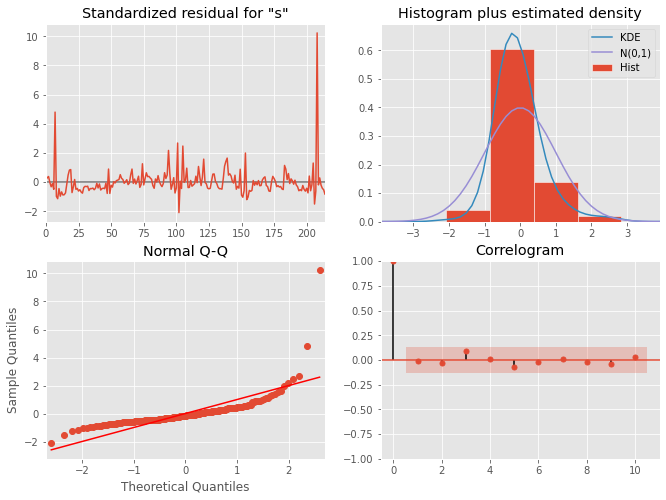

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline
# The following tools aid in time series analysis:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def train_test(df):
    #Set training data before 2021
    train = df[:'2021-03-01']
    print("train",train)
    #Set test data starting 2021
    test = df['2021-03-01':]
    print(test)
    return train, test
def fit_model(df,pdq,pdqs):
    # Use train_test function
    train, test = train_test(df)
    # Fit the model, give the summary information & diagnostics
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results
pdq = (1,1,2)
pdqs = (0,0,0,0)
train, test, results = fit_model(var_df,pdq=pdq,pdqs=pdqs)

22028.263397300732
SARIMA model RMSE on train data: 22028.26340


<Figure size 1080x504 with 0 Axes>

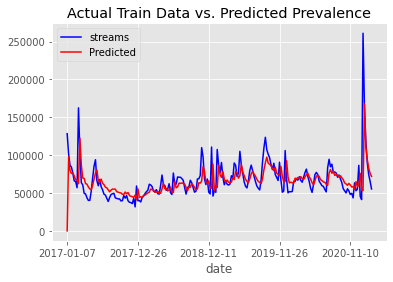

In [ ]:
def train_RMSE(train, results, display = True):
    # Validate Training Data on 40 Years of Data
    train_pred = results.predict()
    # Compare Real Training Data to Predicted Data
    rmse = sqrt(MSE(train,train_pred))
    print(rmse)
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(15,7))
        train.plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Prevalence')
        plt.show()


train_RMSE(train, results)

42192.78748112985
SARIMA model RMSE on train data: 42192.78748


<Figure size 1080x504 with 0 Axes>

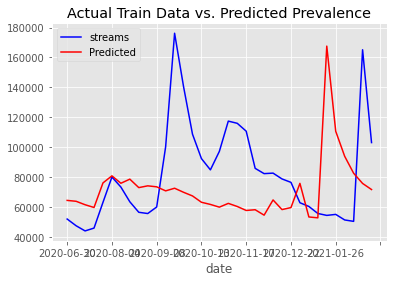

In [ ]:
def test_RMSE(test, results, display = True):
    # Validate Training Data on 40 Years of Data
    test_pred = results.predict(-35)
    # Compare Real Training Data to Predicted Data
    rmse = sqrt(MSE(test,test_pred))
    print(rmse)
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(15,7))
        test.plot(label='Actual',color='b')
        test_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Prevalence')
        plt.show()


test_RMSE(test, results)

### LSTM